<a href="https://colab.research.google.com/github/QueenieeQ/License_Plate_Detection_Final_Exam/blob/main/AI_Train_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd'/content/drive/My Drive/AI_dataset'

/content/drive/My Drive/AI_dataset


In [5]:
X = []
Y = []
list_link = os.listdir(r'data/')
print(list_link)


['85', '83', '89', '82', '88', '80', '78', '90', '84', '86', '69', '67', '75', '76', '68', '72', '66', '71', '77', '70', '49', '54', '50', '57', '56', '52', '55', '65', '53', '51', '48']


In [6]:
for i in list_link:
    link = r'data/{}'.format(i)
    link_img = os.listdir(link)
    for j in link_img:
        img = cv2.imread(r'data/{}/{}'.format(i,j), 0)
        img = cv2.resize(img,(30,60))
        img = img.reshape(1, -1)
        X.append(img[0].tolist())
        Y.append(int(i))
        
        
        

In [7]:
X = np.array(X,dtype=np.float32)
Y = np.array(Y)

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)#, random_state=7
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2)
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

y_train = y_train.reshape(-1, 1)


In [9]:
svm_model = cv2.ml.SVM_create()
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.setKernel(cv2.ml.SVM_INTER)
svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 1000, 1e-10))
svm_model.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
#svm_model.save("model_svm.xml")

True

In [10]:
a = svm_model.predict(X_test)
y_predicted = []
for i in a[1]:
    y_predicted.append(i[0])
y_predicted = np.array(y_predicted)


In [11]:
target = [chr(x) for x in y_predicted]
target = list(set(target))
target.sort()
print('accuracy  = ',accuracy_score(y_test,y_predicted))
print('precision = ', precision_score(y_test,y_predicted,average= 'weighted'))
print('recall    = ', recall_score(y_test,y_predicted,average= 'weighted'))
print("f1        =", f1_score(y_test,y_predicted, average= 'weighted'))
print(classification_report(y_test, y_predicted, target_names=target))

accuracy  =  0.9523809523809523
precision =  0.9644954648526076
recall    =  0.9523809523809523
f1        = 0.9519209614861789
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.86      1.00      0.92        12
           2       1.00      0.69      0.82        13
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         8
           9       1.00      0.88      0.93         8
           A       1.00      1.00      1.00         4
           B       0.92      1.00      0.96        11
           C       1.00      1.00      1.00         7
           D       1.00      0.80      0.89        10
           E       1.00      1.00      1.00        10
        

Text(159.0, 0.5, 'Truth')

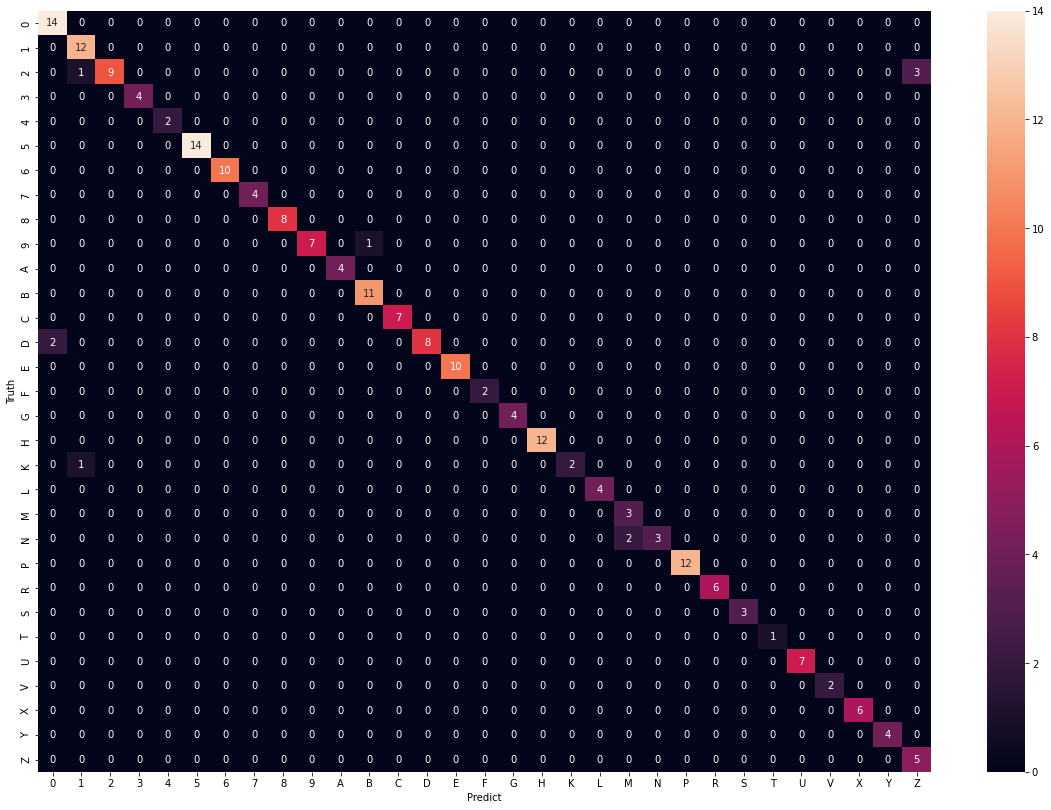

In [12]:
cm = confusion_matrix(y_test, y_predicted)
cm = pd.DataFrame(data = cm[0:,0:], index = target, columns = target)
plt.figure(figsize = (20,14))
sn.heatmap(cm, annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")
